# linear Regression 

linear Regression find the best line,which pass over data points
y=b+mx        equation 
where y is predicted value,b is constant,m is slope of the line,x is the independent values with help of which the y will be predicted,

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset=pd.read_csv("./Salary_Data.csv")
# X=dataset.iloc[:,:-1].values
# y=dataset.iloc[:,1:].values

In [10]:

# missing data
# from sklearn.impute import SimpleImputer
# model=SimpleImputer(missing_values="all",strategy="mean")
# imputer=model.fit(features)
# feautres=imputer.transform(features)

In [11]:
# spliting the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)



In [12]:
# linear Regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.coef_

array([[9345.94244312]])

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
model.intercept_
# predication the test set result
y_pred=model.predict(X_test)
# predication on new data
model.intercept_

mse = mean_squared_error(y_test, y_pred)

# Let's take the square root
rmse = np.sqrt(mse)
# Print the result
print('Root Mean Squared Error: ' + str(rmse))
check=mean_absolute_error(y_test,y_pred)
# print(check)

Root Mean Squared Error: 4585.4157204675885


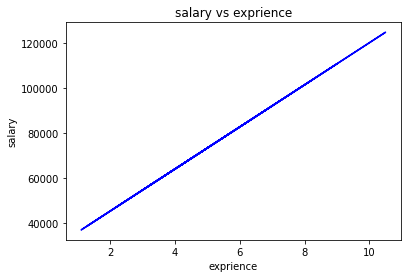

In [18]:
# plotting graph of training learning 
# plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,model.predict(X_train),color="blue")
plt.title("salary vs exprience")
plt.xlabel("exprience")
plt.ylabel("salary")
plt.show()


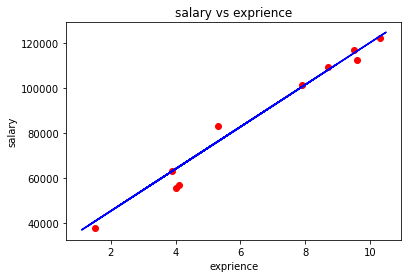

In [42]:
# # plotting graph of training learning 
plt.scatter(X_test,y_test,color="red")
plt.plot(X_train,model.predict(X_train),color="blue")
plt.title("salary vs exprience")
plt.xlabel("exprience")
plt.ylabel("salary")
plt.show()

# simple liner regression
it looks for statistical relationship but not deterministic relationship

 The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

# forumlas 


first formula for error   
![title](error.png)

  

 this is formula for co effient
<img src="coeffient.png">

formula for slope 
![title](slope.png)

# exploring b1 slope
1)if b1>0 then x andy have postive realationship
and increase in x will increase y

2)if b1<0 then x andy have negative  realationship
and increase in x will decrease y

# exploring b0 or co effient
The value of b0 guarantee that residual have mean zero. If there is no ‘b0’ term, then regression will be forced to pass over the origin. Both the regression co-efficient and prediction will be biased.



# normal equation of co effient

![title](normal_equ.png)
Theta contains co-efficient of all predictors including constant term ‘b0’.

Normal equation performs computation by taking inverse of input matrix. Complexity of the computation will increase as the number of features increase. It gets very slow when number of features grow large.
complixiety is n^2.5 or n^3

In [8]:
from statistics import mean
from matplotlib import style
# normal equation 
def normal_equ(X_train,y_train):
    n_data=X_train.shape[0]
    bias=np.ones((n_data,1))
    X_train_b=np.append(bias,X_train,axis=1)
    theta1=np.linalg.inv(np.dot(X_train_b.T,X_train_b))
    theta2=np.dot(theta1,X_train_b.T)
    theta=np.dot(theta2,y_train)
    return theta

In [9]:
theta=normal_equ(X_train,y_train)

In [10]:
theta

array([[1.55431223e-15, 2.68161922e+04],
       [1.00000000e+00, 9.34594244e+03]])

# Residual Analysis
Prediction = Deterministic + Statistic


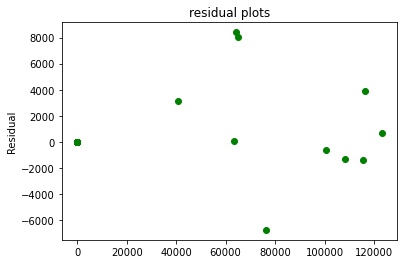

In [11]:
plt.scatter(y_pred,y_pred-y_test,color="g")
plt.hlines(y=0,xmin=0,xmax=len(y_test))
plt.title("residual plots")
plt.ylabel("Residual")
plt.show()

This value ranges from 0 to 1. Value ‘1’ indicates predictor perfectly accounts for all the variation in Y. Value ‘0’ indicates that predictor ‘x’ accounts for no variation in ‘y’.

In [12]:
# R square formula
def rsq(predication,y_test):
    total_data=len(predication)
    y_avg=np.sum(y_test)/total_data
    total_error=np.sum((y_test-y_avg)**2)
    res_err=np.sum((y_test-predication)**2)
    r2=1-(res_err/total_error)
    return r2

In [13]:
square_error=rsq(y_pred,y_test)
square_error

0.9974445798289048

Is the range of R-Square always between 0 to 1?
Value of R2 may end up being negative if the regression line is made to pass through a point forcefully. This will lead to forcefully making regression line to pass through the origin (no intercept) giving an error higher than the error produced by the horizontal line. This will happen if the data is far away from the origin.


Correlation co-efficient (r)
This is related to value of ‘r-squared’ which can be observed from the notation itself. It ranges from -1 to 1.
r = (+/-) sqrt(r²)
If the value of b1 is negative, then ‘r’ is negative whereas if the value of ‘b1’ is positive then, ‘r’ is positive. It is unitless.

co effient
The correlation coefficient can take any value from -1 to 1.
r = 1 means that two variables are perfectly correlated (a positive change in one variable perfectly predicts a positive change in the other)
r = 0 means that two variables are not correlated (a change in one variable does not predict a change in the other)
r = -1 means that two variables are negatively correlated (a positive change in one variable perfectly predicts a negative change in the other)

# adjusted r value




In [43]:
adjusted_r=1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [45]:
# adjusted_r